In [ ]:
import pandas as pd

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks')
!ls

'A* Belgium.ipynb'  'AI_Week 3.ipynb'	     'NMBS - Studentenjobs'
'AI_Week 10.ipynb'  'AI_Week 4.ipynb'	     'Numpy Learning.ipynb'
'AI_Week 11.ipynb'   Algorithms.ipynb	      Untitled0.ipynb
'AI_Week 12.ipynb'   AmesHousing.csv	      Untitled1.ipynb
'AI_Week 13.ipynb'  'Ames Housing.ipynb'      Untitled2.ipynb
'AI_Week 14.ipynb'   CarProduction.csv	     'Wine ANN'
'AI_Week 15.ipynb'   clustering_dataset.csv   winequality-red.csv
'AI_Week 1.ipynb'    ford.csv		      winequality-white.csv
'AI_Week 2.ipynb'    iris.csv


In [ ]:
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine['type'] = 0
red_wine['type'] = 1

In [ ]:
data = pd.concat([white_wine, red_wine])

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
data['type'].value_counts()

,count
type,
0,4898
1,1599


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Feature Correlation Matrix')

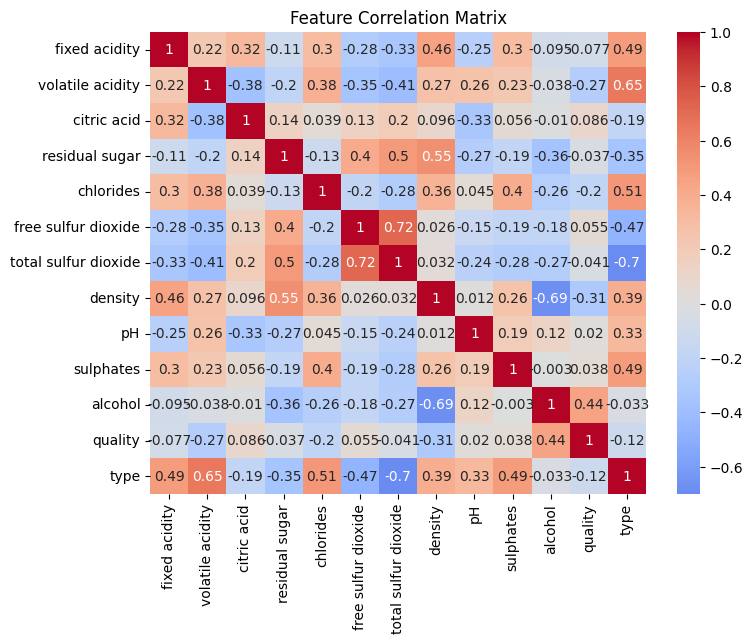

In [ ]:
plt.figure(figsize=(8,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns='type')
y = data['type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

# Model Setup

In [ ]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(12, activation='relu'), input_shape=(12,))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9627 - loss: 0.1395
Epoch 2/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9955 - loss: 0.0248
Epoch 3/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9960 - loss: 0.0217
Epoch 4/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9966 - loss: 0.0188
Epoch 5/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9961 - loss: 0.0167
Epoch 6/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9970 - loss: 0.0158
Epoch 7/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9961 - loss: 0.0186
Epoch 8/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9968 - loss: 0.0149
Epoch 9/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9970 - loss: 0.0166
Epoch 10/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9971 - loss: 0.0153
Epoch 11/20
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9959 - loss: 0.0220
Epoch 12/20
5197/51

In [ ]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
y_pred[5:]

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [1.5424289e-06]], dtype=float32)

In [ ]:
y_test[5:]

,type
1297,0
1773,0
686,1
561,0
1048,1
...,...
889,0
2850,0
19,1
300,1


In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7342 - loss: 326.3230


In [ ]:
score

[319.4900207519531, 0.7376922965049744]

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[866, 120],
       [221,  93]])